### Importing Libs

In [6]:
import nltk 
import re
import string

### Removing Number from Text

In [70]:
def remove_num (text):
    result = re.sub(r'\d+',"",text)
    return result 

input_s  = "there might be 5numbers inside that text like 12 2 3 "
remove_num(input_s)

'there might be numbers inside that text like    '

### Converting Numbers into words

In [8]:
import inflect 

q = inflect.engine()

def convert_num(text):
    
    #split string into list of texts 
    temp_string = text.split()
    
    #intialize list 
    new_str = []
    
    for word in temp_string:
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
            
        else:
            new_str.append(word)
            
    return ' '.join(new_str)

input_s  = "there might be 645 5numbers inside that text like 1 2 3 "
convert_num(input_s)

'there might be six hundred and forty-five 5numbers inside that text like one two three'

### Remove Punctuation

if we have comma, question mark, exclaimation marks that all will be removed by this process

#### Note: 
you can even remove numbers, asci values whatever you want

In [13]:
def rem_punctuation(text):
    translator = str.maketrans('','',string.punctuation )
    return text.translate(translator)

input_str = "Hey, Are you exicted?? After a week, we will be in Pakistan for sure!!!"
rem_punctuation(input_str)

'Hey Are you exicted After a week we will be in Pakistan for sure'

### Remove Stopwords

Stopwords are those words that donot contrbute to the meaning of a sentense. Hence, they can be safely removed without causing change in the meaning of sentense. The NLTK (Natural Langugae tool kit) libarary has the set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.

#### For example:

In Language translation we didnot remove the stopwords as they have importance over there while in the sentiment analysis you can simple remove them beacuse they have usually no impact on sentiments.

In [31]:
#corpus is the dataset 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


#remove stopwords (stopwprds are specific to langugae wise, different for different languagaes )

def rem_stopwprds(text):
    stop_words = set(stopwords.words('english'))
    #there is words tokenization, sentense tokenization, in words we are splitting words into list
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

text_sample = "Data is new to AI world. A.I is the besy invention so far..."
rem_stopwprds(text_sample)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Data', 'new', 'AI', 'world', '.', 'A.I', 'besy', 'invention', 'far', '...']

### Stemming

The Stemming is kind of process where it will be able to convert word into it's base word. In some of  the problems same word is used in different form of verb so in order to prevent model from confusion we use stemming process that is converting into it's base word.

#### For Example:

Mangoes -> Mango 
Boys    -> Boy
going   -> go 

#### Note:

if sentenses are not in form of tokens we first convert them into  tokens, After converting them into tokens then we can convert them into their root form if applicable.

There are three type of stemmer:

1) Porter Stemmer 

2) Snowball Stemmer 

3) Lancaster Stemmer

In [40]:
#Port Stemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stem1 = PorterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems

text = "Data is the most import aspect in the field of Artficial Intelligence. It can be either in form  Images, Videos or Audio's."
" ".join(stem_words(text))

"data is the most import aspect in the field of artfici intellig . It can be either in form imag , video or audio 's ."

In [44]:
#Lancaster Stemmer

from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import word_tokenize
stem1 = LancasterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems

text = "Data is the most import aspect in the field of Artficial Intelligence. It can be either in form  Images, Videos or Audio's."
" ".join(stem_words(text))

"dat is the most import aspect in the field of artf intellig . it can be eith in form im , video or audio 's ."

### Lemmatization

The process of converting word into its nearest possible word which can have similar kind of meaning. sometimes it work like stemming. One more thing in Lemmatization is that it ensures that root word belongs to languagae.It can also find the synonums. Moreover, we can do can do lemmatization for specific things in parts of speech like over here we only did for verb.

In [52]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

lemma  = wordnet.WordNetLemmatizer()
#dictionary of synonums words for mapping
nltk.download('wordnet')

# Lemmatize String

def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemma.lemmatize(word ,pos='v') for word in word_tokens]
    return lemmas

text = "Data is the most import aspect in the field of Artficial Intelligence. It can be either in form  Images, Videos or Audio's."
" ".join(lemmatize_word(text))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"Data be the most import aspect in the field of Artficial Intelligence . It can be either in form Images , Videos or Audio 's ."

### POS Tagging

Assining tags to each word in a setense


Just search for POS nltk tags on google

In [57]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

#convert text into words with their tags 
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)


pos_tagg("Are you afraid of being punished?")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('being', 'VBG'),
 ('punished', 'VBN'),
 ('?', '.')]

In [63]:
# We can get that tags meanining here by downloading Penn Treebank tagset 
nltk.download('tagsets')

nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('NNP')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('VBG')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Chunking

The process of extracting the phrases from unstructred text and give them structure. we also called them shallow parsing. we can do it on top of pos tagging. It group words into chunks for noun pharses. It usually performed with the help of regex.

In [71]:
from nltk.tokenize  import word_tokenize
from nltk import pos_tag

def chunking(text,grammer):
    word_tokens = word_tokenize(text)
    
    #Labelling words with tokenize
    word_pos = pos_tag(word_tokens)
    
    #creating a chunk parser using grammer 
    chunkParser  = nltk.RegexpParser(grammer)
    
    #test it on the list of word tokens with tagges pos 
    tree = chunkParser.parse(word_pos)
    
    for subtree in tree.subtrees():
        print(subtree)
    
    tree.draw()
senetence = 'the little boy is playing in the park' 
grammer = "NP: {<DT>?<JJ>*<NN>}"
chunking(senetence,grammer)

(S
  (NP the/DT little/JJ boy/NN)
  is/VBZ
  playing/VBG
  in/IN
  (NP the/DT park/NN))
(NP the/DT little/JJ boy/NN)
(NP the/DT park/NN)


### Name Entity Recognition 

        

In [69]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk 
nltk.download('maxent_ne_chunker')
nltk.download('words')

def ner(text):
    
    #tokenize the text
    word_tokens = word_tokenize(text)
    
    #pos tagging of words 
    word_pos = pos_tag(word_tokens)
    
    #tree of word entities
    print(ne_chunk(word_pos))

text = 'Yasir Shah score highest 400 runs in test match which played between Pakistan and WestIndies'
ner(text)

#Here these libs fails where the libs predcting the westindies country as an organization and many more cases happens even with capitalizing.

(S
  (PERSON Yasir/NNP)
  (PERSON Shah/NNP)
  score/VBD
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  test/NN
  match/NN
  which/WDT
  played/VBD
  between/IN
  (GPE Pakistan/NNP)
  and/CC
  (ORGANIZATION WestIndies/NNS))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\AbdulRehman\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


###  Regex

Formatting the data in our desire format


> ^ Start of the string

> w+ is used to match the alpha numeric characters in the string  and underscore too. we have use this expression wiht the "\\" slash


In [82]:
import re 


#Getting only alpha numerice characters

def find_alphanumeric(text):
    data = re.findall(r'^\w+',text)
    return " ".join(data)

sample_text = "Coummity_23 helps people to grow like fast13"
find_alphanumeric(sample_text)

# Here only the first word is coming beacuse we have a check that if the string starts with alphanumeric character or starts 
# with underscore then diaplay that work only.


'Coummity'

### Regex Online Websites
 
> https://regex101.com/

> https://regexr.com/

In [85]:
#Splitting the dataset based on space (Make sure youo must use \ before s to split the string )

import re 

re.split(r"\s","Some String comes here")

['Some', 'String', 'comes', 'here']

### Regex Important Methods

1. re.match()
2. re.find()
3. re.search()
4. re.groups()

In [91]:
import re 

# here the regular expressions states that check if the string had i in the first and then rest of the charcters are alphanumeric
# if yes then check \W(that means all the charcters that are not in \w) like space, exclamaition mark if they comes then check 
# the third group, if all ok then print that string

lists= ['icecreams ice','mangoes','banana']

for i in lists:
    q = re.match("(i\w+)\W((i\w+))",i)
    if q :
        print(q.groups())

('icecreams', 'ice', 'ice')


In [98]:
import re 

#This regular expression is weak one if there comes some text that contains @ sign so it will be going to fail so for that you can use specific gmail or hotmail 
emails = "some-email123.@gmail.com,emailali@gmail.com,hotmail1234@hotmail.ai,abdul rehman"

re.findall(r"[\w\.-]+@[\w\.-]+",emails)

['some-email123.@gmail.com', 'emailali@gmail.com', 'hotmail1234@hotmail.ai']

### Text Normalization

Whenever we have kind of noisy text like 2morrow(tomarrow),2mrrw(tommorrow),tomrw(tomarrow),b4(before),otw(on the way),:)(smile) you can use text normalized from the raw text. This is the part of data preprocessing when you have to deal with the nlp problem.

Text normalization is too useful for noisy text such as social media comments, comment, blos posts, abbreviations, missed spellings. Text normalization is also useful for topic extraction where near synonyms and spelling differences are common like e.g. ('topic modelling','topic modeling','topic-modelling')

Some of the common approches to text normalization includes dictionary mappings, statistical machine translation(SMT),
and spelling correction based appraoches.


### Word Count

In [103]:
from nltk.tokenize.regexp import WhitespaceTokenizer
text = "There are some string that comes into the picture"
tokens = WhitespaceTokenizer().tokenize(text)
print(len(tokens))


9


### WorkPunctuation Tokenizer

In [105]:
from nltk.tokenize.regexp import WordPunctTokenizer
text = "There is no need to panic, We need to work together, take small yet imprtant measures."
tokens = WordPunctTokenizer().tokenize(text)
print(len(tokens))

19


In [107]:
#Base on the punctuations we need to tokenize so we used that punctuations tokenize
tokens

['There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 ',',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'imprtant',
 'measures',
 '.']

### Frquency Distribution

Counting your words in your texts

In [109]:
import nltk
from nltk.tokenize import word_tokenize

text = "There is a need  of a person here. if he is willing to donate somehting it will be his kindness."
frequence_dist = nltk.FreqDist(word_tokenize(text))
print(frequence_dist)

<FreqDist with 19 samples and 22 outcomes>


In [113]:
frequence_dist.items()

dict_items([('There', 1), ('is', 2), ('a', 2), ('need', 1), ('of', 1), ('person', 1), ('here', 1), ('.', 2), ('if', 1), ('he', 1), ('willing', 1), ('to', 1), ('donate', 1), ('somehting', 1), ('it', 1), ('will', 1), ('be', 1), ('his', 1), ('kindness', 1)])

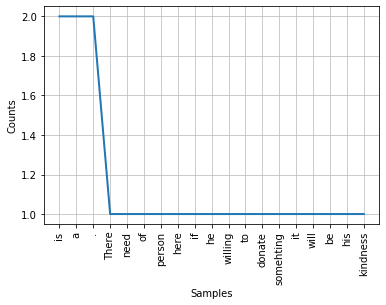

In [117]:
# The word that is comming less time there is less chance that it will contribute in the model building...
frequence_dist.plot(20)
